In [1]:
import numpy as np
import pandas as pd

from pydataset import data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

from wrangle import wrangle_telco
import split_scale as ss
import explore as ex
import evaluate as ev
import feature_engineering as fe

In [2]:
# def select_kbest(features, target_variable, k):
#     f_selector = SelectKBest(f_regression, k=k)
#     f_selector.fit(features, target_variable)
#     f_support = f_selector.get_support()
#     f_feature = features.columns[f_support]
#     return f_feature

In [3]:
# def select_rfe(features, target_variable, k):
#     lm = LinearRegression()
#     rfe = RFE(lm, k)
#     rfe.fit(features, target_variable)
#     mask = rfe.support_
#     rfe_features = features.columns[mask]
#     return rfe_features

In [4]:
# Zach's functions
def select_kbest(X, y, k):
    kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_regression, k)
    kbest.fit(X, y)
    return X.columns[kbest.get_support()].tolist()

In [5]:
# Zach's functions
def select_rfe(X, y, k):
    lm = sklearn.linear_model.LinearRegression()
    rfe = sklearn.feature_selection.RFE(lm, k)
    rfe.fit(X, y)
    return X.columns[rfe.support_].tolist()

### 1. Load the tips dataset.

- a. Create a column named tip_percentage. This should be the tip amount divided by the total bill.
- b. Create a column named price_per_person. This should be the total bill divided by the party size.
- c. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?
- d. Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?
- e. Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?
- f. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

In [6]:
tips = data("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
# a. Create a column named tip_percentage.
# This should be the tip amount divided by the total bill.
tips["tip_percentage"] = tips["tip"] / tips["total_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [8]:
# b. Create a column named price_per_person.
# This should be the total bill divided by the party size.
tips["price_per_person"] = tips["total_bill"] / tips["size"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,9.676667
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,13.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,11.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,8.910000


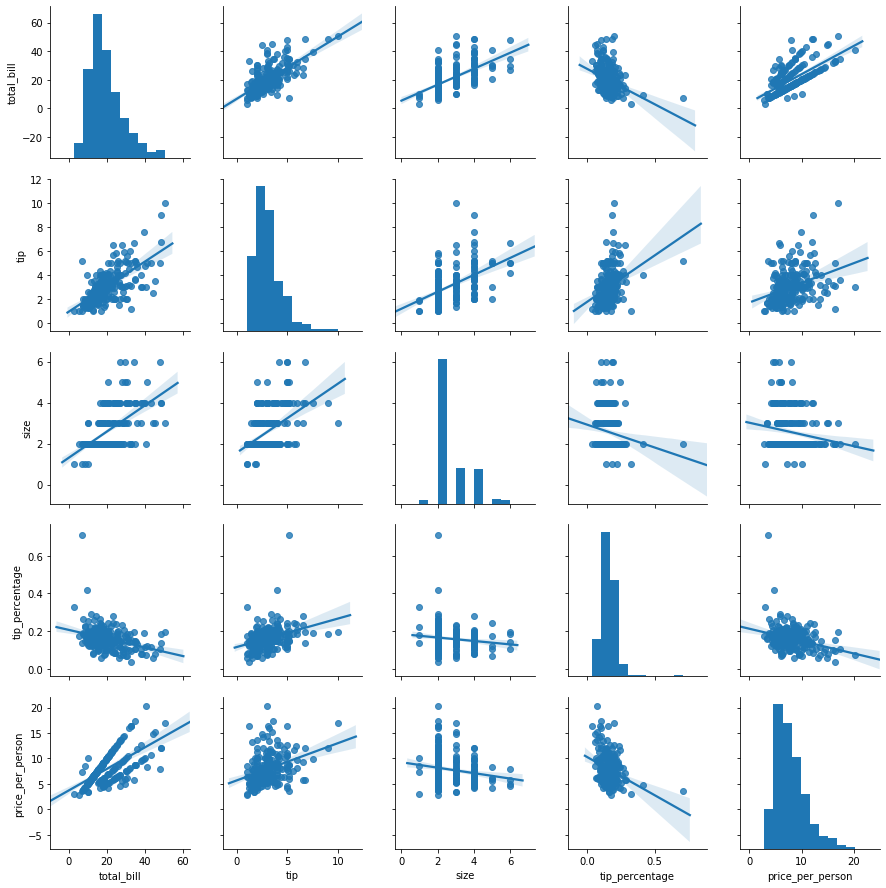

In [9]:
# c. Before using any of the methods discussed in the lesson,
# which features do you think would be most important for
# predicting the tip amount? The tip percentage?
sns.pairplot(data=tips, kind="reg")
plt.show()

In [10]:
# d. Use all the other numeric features to predict tip amount.
# Use select k best and recursive feature elimination to select the
# top 2 features. What are they?
tips = tips.drop(columns=["sex", "smoker", "day", "time"])
tips

,total_bill,tip,size,tip_percentage,price_per_person
1,16.99,1.01,2,0.059447,8.495000
2,10.34,1.66,3,0.160542,3.446667
3,21.01,3.50,3,0.166587,7.003333
4,23.68,3.31,2,0.139780,11.840000
5,24.59,3.61,4,0.146808,6.147500
...,...,...,...,...,...
240,29.03,5.92,3,0.203927,9.676667
241,27.18,2.00,2,0.073584,13.590000
242,22.67,2.00,2,0.088222,11.335000
243,17.82,1.75,2,0.098204,8.910000


In [11]:
train, test = ss.split_my_data(tips)

In [12]:
train.shape

(195, 5)

In [13]:
test.shape

(49, 5)

In [14]:
# For the feature engineering methods,
# we want to use the scaled data
scaler, train, test = ss.standard_scaler(train, test)

In [15]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
train.head()

,total_bill,tip,size,tip_percentage,price_per_person
3,0.122108,0.292835,0.469692,0.048355,-0.325697
99,0.122108,-0.056717,-0.607837,-0.328668,0.887011
155,-0.016458,-0.755822,1.547221,-0.988125,-1.039411
196,-1.380890,-1.147321,-0.607837,0.426815,-1.442012
61,0.041650,0.090095,-0.607837,-0.084426,0.762335


In [17]:
test.head()

,total_bill,tip,size,tip_percentage,price_per_person
13,-0.502558,-1.056437,-0.607837,-0.977789,-0.080962
43,-0.667944,-0.014771,-0.607837,0.886818,-0.337241
126,1.104365,0.782209,3.702279,-0.357970,-1.031042
202,-0.802040,-0.748831,-0.607837,-0.091321,-0.545035
127,-1.273613,-1.119356,-0.607837,0.161179,-1.275777


> Question: I thought we were not going to scale our target variable?

In [18]:
X_train = train.drop(columns="tip")
X_test = test.drop(columns="tip")
y_train = train[["tip"]]
y_test = test[["tip"]]

In [19]:
X_train

,total_bill,size,tip_percentage,price_per_person
3,0.122108,0.469692,0.048355,-0.325697
99,0.122108,-0.607837,-0.328668,0.887011
155,-0.016458,1.547221,-0.988125,-1.039411
196,-1.380890,-0.607837,0.426815,-1.442012
61,0.041650,-0.607837,-0.084426,0.762335
...,...,...,...,...
163,-0.414278,0.469692,-0.636148,-0.879814
193,0.952389,-0.607837,-1.164758,2.173601
144,0.797060,3.702279,0.337569,-1.189773
229,-0.741697,-0.607837,0.654045,-0.451528


In [20]:
X_test.shape

(49, 4)

In [21]:
y_train

,tip
3,0.292835
99,-0.056717
155,-0.755822
196,-1.147321
61,0.090095
...,...
163,-0.755822
193,-0.364323
144,1.341493
229,-0.252466


In [22]:
y_test.shape

(49, 1)

#### Select K Best

#### sklearn general process
1. Make the object
2. Fit the object (".fit") on the training data
3. Use the object (".transform", ".predict") on the training data or the test data or even on unseen data

In [23]:
# initialize f_selector object
f_selector = SelectKBest(f_regression, k=2)

In [24]:
# fit object to data
f_selector.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=2, score_func=<function f_regression at 0x12e2d1710>)

In [25]:
# transform DataFrame
X2 = f_selector.transform(X_train)

In [26]:
print(X2.shape)
print(X_train.shape)

(195, 2)
(195, 4)


In [27]:
# get list of selected features
f_support = f_selector.get_support()
f_support # mask

array([ True,  True, False, False])

In [28]:
# use .loc with mask to subset selected features
f_feature = X_train.loc[:, f_support].columns.tolist()
f_feature

['total_bill', 'size']

In [29]:
select_kbest(X_train, y_train, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'size']

#### Recursive Feature Elimination

In [30]:
# initialize linear regression object
lm = LinearRegression()

In [31]:
# initialize RFE object
rfe = RFE(lm, 2)

In [32]:
# fit the RFE object to data
# transform DataFrame to only inclue those 2 features 
X_rfe = rfe.fit_transform(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# fitting the data to model
lm.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# create mask for selected features
mask = rfe.support_

In [35]:
# index columns
rfe_features = X_train.loc[:, mask].columns.tolist()
rfe_features

['total_bill', 'tip_percentage']

In [36]:
select_rfe(X_train, y_train, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip_percentage']

In [37]:
# get feature rank
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()

ranks = pd.DataFrame({"Variable": var_names, "Rank": var_ranks})
ranks

,Variable,Rank
0,total_bill,1
1,size,2
2,tip_percentage,1
3,price_per_person,3


In [38]:
# Use all the other numeric features to predict tip percentage.
# Use select k best and recursive feature elimination to select
# the top 2 features. What are they?

train, test = ss.split_my_data(tips) # split data
scaler, train, test = ss.standard_scaler(train, test) # scale data
X_train = train.drop(columns="tip_percentage")
X_test = test.drop(columns="tip_percentage")
y_train = train[["tip_percentage"]]
y_test = test[["tip_percentage"]]

In [39]:
# Select K Best
X2 = SelectKBest(f_regression, k=2).fit_transform(X_train, y_train)
f_support = f_selector.get_support()
f_feature = X_train.loc[:, f_support].columns.tolist()
f_feature

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip']

In [40]:
# RFE
lm = LinearRegression()
rfe = RFE(lm, 2)
X_rfe = rfe.fit_transform(X_train, y_train)
mask = rfe.support_
rfe_features = X_train.loc[:, mask].columns.tolist()
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()
ranks = pd.DataFrame({"Variable": var_names, "Rank": var_ranks})
ranks

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variable,Rank
0,total_bill,1
1,tip,1
2,size,3
3,price_per_person,2


---
### 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [41]:
# def select_kbest(features, target_variable, k):
#     X2 = SelectKBest(f_regression, k=k).fit_transform(features, target_variable)
#     f_support = f_selector.get_support()
#     f_feature = features.loc[:, f_support].columns.tolist()
#     return f_feature

In [42]:
select_kbest(X_train, y_train, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip']

### 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [43]:
# def rfe_function(features, target_variable, k):
#     lm = LinearRegression()
#     rfe = RFE(lm, k)
#     X_rfe = rfe.fit_transform(features, target_variable)
#     mask = rfe.support_
#     rfe_features = features.loc[:, mask].columns.tolist()
#     return rfe_features

In [44]:
select_rfe(X_train, y_train, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip']

### 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [45]:
swiss = data("swiss")
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [46]:
train, test = ss.split_my_data(swiss, seed=123)
# scaler, train, test = ss.standard_scaler(train, test)

In [47]:
train.shape

(37, 6)

In [48]:
test.shape

(10, 6)

In [49]:
X_train = train.drop(columns="Fertility")
X_test = test.drop(columns="Fertility")
y_train = train[["Fertility"]]
y_test = test[["Fertility"]]

In [50]:
X_train

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Broye,70.2,16,7,92.85,23.6
Paysd'enhaut,63.5,6,3,2.56,18.0
Avenches,60.7,19,12,4.43,22.7
Aubonne,67.5,14,7,2.27,19.1
Oron,71.2,12,1,2.40,21.0
Sierre,84.6,3,3,99.46,16.3
Moudon,55.1,14,3,4.52,22.4
Rolle,60.8,16,10,7.72,16.3
Echallens,72.6,18,2,24.20,21.2
La Chauxdfnd,7.7,29,11,13.79,20.5


In [51]:
X_test

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Gruyere,53.3,12,7,97.67,21.0
Aigle,62.0,21,12,8.52,16.5
V. De Geneve,1.2,37,53,42.34,18.0
La Vallee,15.2,31,20,2.15,10.8
ValdeTravers,18.7,25,7,8.65,19.5
Entremont,84.9,7,6,99.68,19.8
Val de Ruz,37.6,15,7,4.97,20.0
Veveyse,64.5,14,6,98.61,24.5
Porrentruy,35.3,9,7,90.57,26.6
Delemont,45.1,6,9,84.84,22.2


In [52]:
y_train

,Fertility
Broye,83.8
Paysd'enhaut,72.0
Avenches,68.9
Aubonne,66.9
Oron,72.5
Sierre,92.2
Moudon,65.0
Rolle,60.5
Echallens,68.3
La Chauxdfnd,65.7


In [53]:
y_test

,Fertility
Gruyere,82.4
Aigle,64.1
V. De Geneve,35.0
La Vallee,54.3
ValdeTravers,67.6
Entremont,69.3
Val de Ruz,77.6
Veveyse,87.1
Porrentruy,76.1
Delemont,83.1


In [54]:
# def select_kbest(features, target_variable):
#     X2 = SelectKBest(f_regression, k=2).fit_transform(features, target_variable)
#     f_support = f_selector.get_support()
#     f_feature = X_train.loc[:, f_support].columns.tolist()
#     return f_feature

In [55]:
# select_kbest(features=X_train, target_variable=y_train, k=3)

In [56]:
# def select_kbest(features, target_variable, k):
#     f_selector = SelectKBest(f_regression, k=3)
#     f_selector.fit(X_train, y_train)
#     X_reduced = f_selector.transform(X_train)
#     f_support = f_selector.get_support()
#     f_feature = X_train.loc[:,f_support].columns.tolist()
#     return f_feature

In [57]:
# f_selector = SelectKBest(f_regression, k=3)
# f_selector.fit(X_train, y_train)
# X_reduced = f_selector.transform(X_train)
# f_support = f_selector.get_support()
# f_feature = X_train.loc[:,f_support].columns.tolist()
# f_feature

In [58]:
select_kbest(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Examination', 'Education', 'Catholic']

In [59]:
select_rfe(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Examination', 'Education', 'Infant.Mortality']